In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Breast Cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.shape

(569, 32)

In [ ]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isna().sum().sum()

0

# KNN Classification

In [ ]:
# We will typically need to convert our target column that is "diagnosis" column which is in object format, so first we map it by "1" for malignant breast tumors and "0" by
# "Benign breast tumors"
# it automatically converts to numeric

In [ ]:
df["diagnosis"] = df["diagnosis"].map({"M":1,"B":0})

In [ ]:
# We are dropping the column called "id", which is of no importance in predicting the diagnosis
df = df.drop(columns="id", axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df["diagnosis"].value_counts(normalize=True)

,proportion
diagnosis,
0,0.627417
1,0.372583


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2, random_state=2)

In [ ]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.22640,0.1326,0.10480,0.2250,0.08321
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.3865,0.17080,0.3193,0.09221
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.4646,0.20130,0.4432,0.10860
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.26980,0.4023,0.14240,0.2964,0.09606


In [ ]:
X_train.shape

(455, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [ ]:
X_train.shape

(455, 30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = knn.predict(X_test)
# accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

In [ ]:
# precision = TP/(TP+FP)
precision = precision_score(y_test, y_pred)
precision

1.0

In [ ]:
# recall = TP/(TP+FN)
recall = recall_score(y_test, y_pred)
recall

0.9333333333333333

In [ ]:
# f1_score = 2*precision*recall/(precision+recall)
f1_score = f1_score(y_test, y_pred)
f1_score

0.9655172413793104

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[69,  0],
       [ 3, 42]])

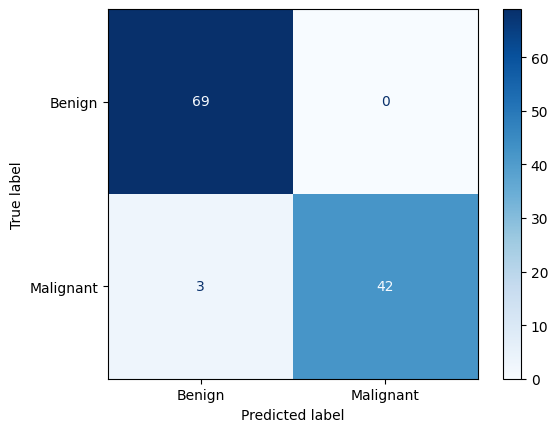

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# How to select K?

In [ ]:
# We generally avoid even value of K
# we do cross validation for differnet value of K, and where the accuracy is maximum, we take that value of "K" for our model prediction

In [ ]:
scores = []
for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

In [ ]:
scores

[0.956140350877193,
 0.9736842105263158,
 0.9912280701754386,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544]

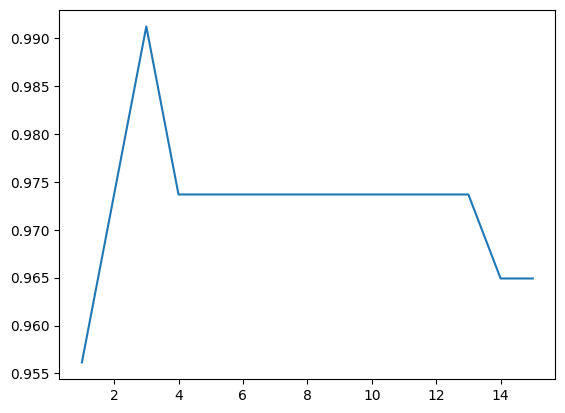

In [ ]:
plt.plot(range(1,16), scores)

In [ ]:
# here accuracy is maximum at the K value of 3
# so, we take value of k=3 & train our model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9912280701754386

# Decision Surface

### A Decision surface in a multidimensional state space that partitions the space into different regions. Data lying on one side of a decision surface are defined as belonging to a different class from those lying on the other.

### We can draw a decision boundary for the breast cancer dataset using a similar approach, but since the dataset has more than two features, we need to reduce the dimensionality to 2D (for visualization purposes). A common technique for this is Principal Component Analysis (PCA), which reduces the dataset to two principal components.

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
X = df.drop(columns="diagnosis", axis=1)
y = df[["diagnosis"]]

In [ ]:
!pip install mlxtend
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [ ]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=2)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

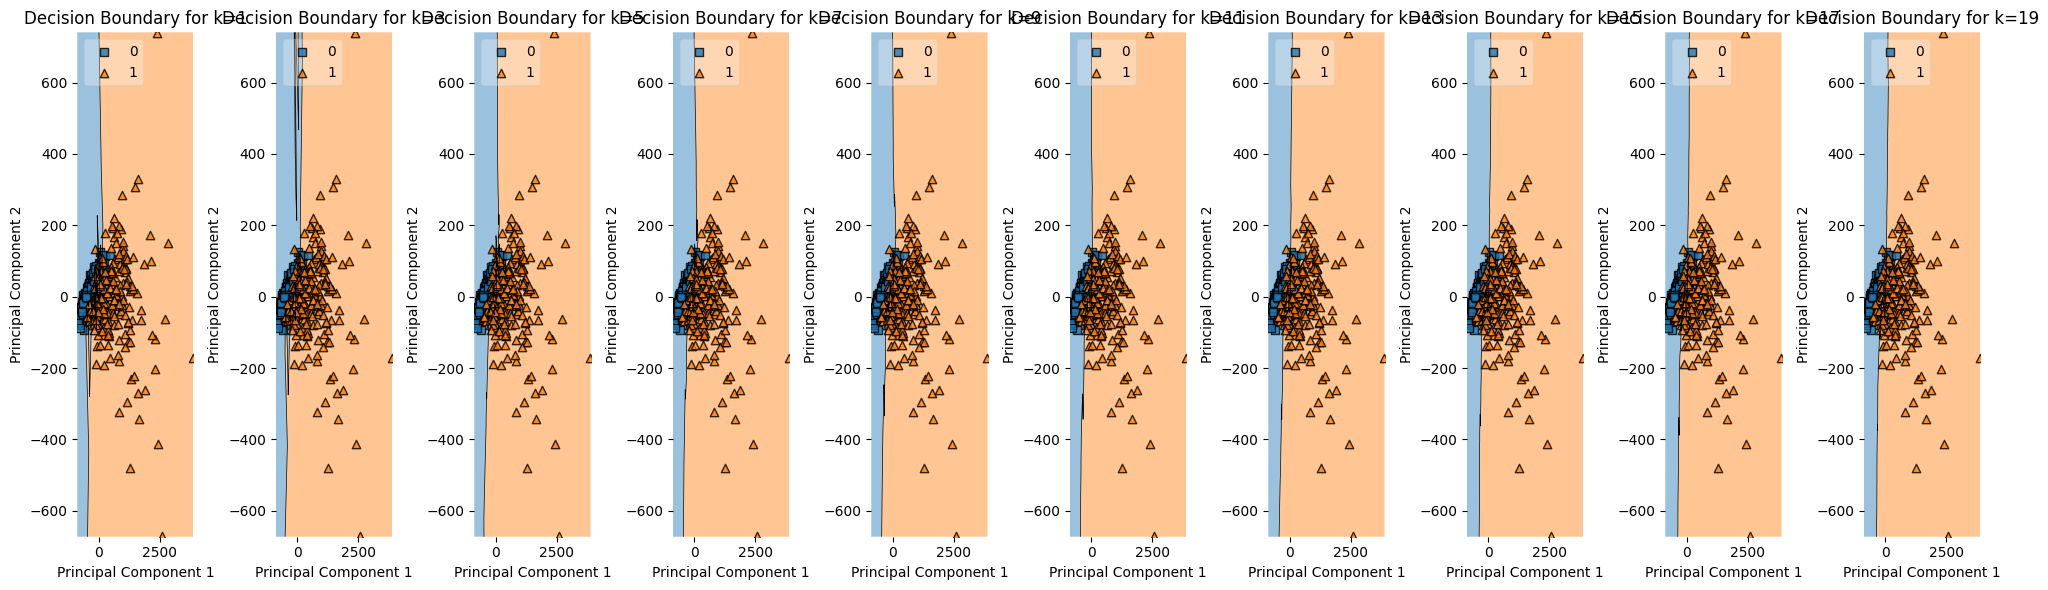

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Create subplots for each k
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 6))

for idx, k in enumerate(k_values):
    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_red, y_train_red)

    # Plot the decision boundary
    axes[idx].set_title(f'Decision Boundary for k={k}')
    plot_decision_regions(X_reduced, y.values.ravel(), clf=knn, ax=axes[idx], legend=2)
    axes[idx].set_xlabel('Principal Component 1')
    axes[idx].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_red, y_train_red)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

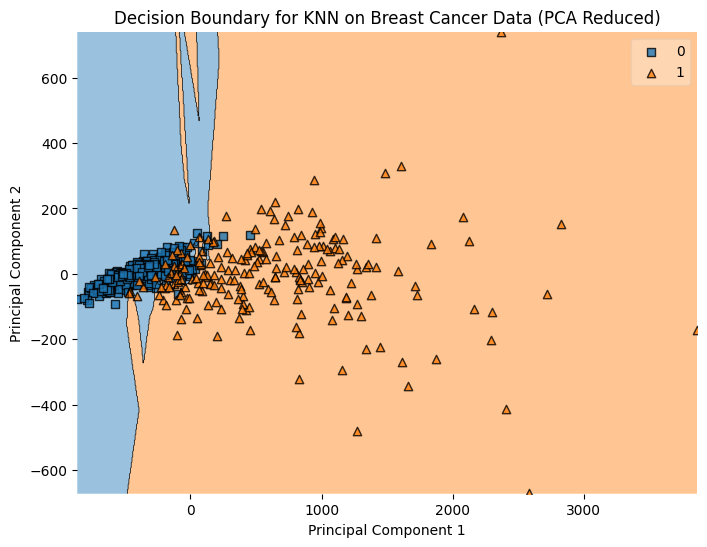

In [ ]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_reduced, y.values.ravel(), clf=knn)
plt.title('Decision Boundary for KNN on Breast Cancer Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Underfitting and Overfitting in KNN

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
train_accuracies = []
test_accuracies = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_red, y_train_red.values.ravel())
  y_train_pred = knn.predict(X_train_red)
  y_test_pred = knn.predict(X_test_red)

  train_acc = accuracy_score(y_train_red, y_train_pred)
  train_accuracies.append(train_acc)

  test_acc = accuracy_score(y_test_red, y_test_pred)
  test_accuracies.append(test_acc)

for i, k in enumerate(k_values):
    print(f"k = {k}: Train Accuracy = {train_accuracies[i]:.3f}, Test Accuracy = {test_accuracies[i]:.3f}")

k = 1: Train Accuracy = 1.000, Test Accuracy = 0.886
k = 3: Train Accuracy = 0.954, Test Accuracy = 0.912
k = 5: Train Accuracy = 0.949, Test Accuracy = 0.912
k = 7: Train Accuracy = 0.938, Test Accuracy = 0.930
k = 9: Train Accuracy = 0.938, Test Accuracy = 0.930
k = 11: Train Accuracy = 0.941, Test Accuracy = 0.930
k = 13: Train Accuracy = 0.938, Test Accuracy = 0.930
k = 15: Train Accuracy = 0.941, Test Accuracy = 0.930
k = 17: Train Accuracy = 0.936, Test Accuracy = 0.930
k = 19: Train Accuracy = 0.932, Test Accuracy = 0.930


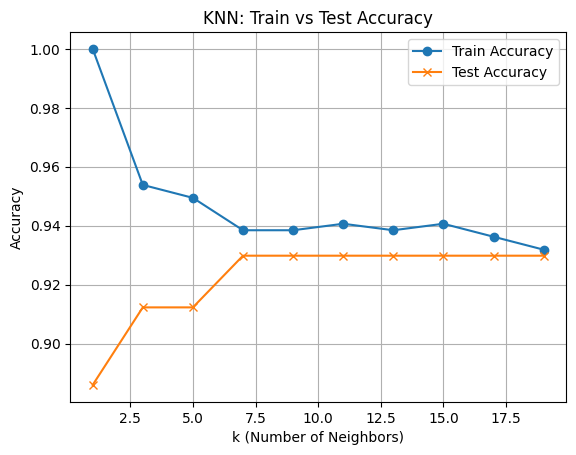

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN: Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to check model performance for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y.values.ravel(), cv=5)  # 5-fold cross-validation
    print(f"k = {k}: Cross-Validation Accuracy = {scores.mean():.3f}")

k = 1: Cross-Validation Accuracy = 0.905
k = 3: Cross-Validation Accuracy = 0.919
k = 5: Cross-Validation Accuracy = 0.928
k = 7: Cross-Validation Accuracy = 0.926
k = 9: Cross-Validation Accuracy = 0.931
k = 11: Cross-Validation Accuracy = 0.930
k = 13: Cross-Validation Accuracy = 0.933
k = 15: Cross-Validation Accuracy = 0.930
k = 17: Cross-Validation Accuracy = 0.930
k = 19: Cross-Validation Accuracy = 0.930
